MTCNNはダウンロードが旨く行かなかったのでYOLOでやりました。
in9から成功してます

In [1]:
%pip install mtcnn opencv-python pillow matplotlib


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 17.9 MB/s  0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ----------- ---------------------------- 11.3/39.0 MB 54.8 MB/s eta 0:00:01
   -------------------- ------------------- 20.4/39.0 MB 50.7 MB/s eta 0:00:01
   ---------------------------- ----------- 27.5/39.0 MB 44.8 MB/s eta 0:00:01
   ------------------------------------- -- 36.2/39.0 MB 43.6 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 38.7 MB/s  0:00:01
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------------------------- ------------ 8.7/12.6 MB 43.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 34.5 MB/s  0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.4

   ---------------------------------------- 0/5 [numpy]
   ----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


↓画像を読み込んで表示

(np.float64(-0.5), np.float64(1107.5), np.float64(1476.5), np.float64(-0.5))

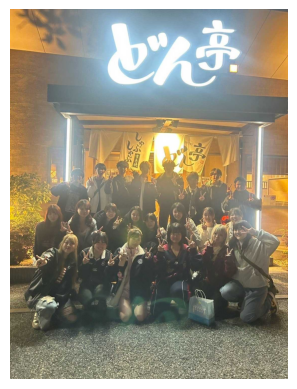

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# 画像ファイル名（GitHubに置いた画像）
image_path = "1765887706510.jpg"

img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")

↓顔検出して人数をカウントするコード

In [3]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# MTCNNの準備
detector = MTCNN()

# 画像を読み込み（OpenCV形式）
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 顔検出
faces = detector.detect_faces(image_rgb)

# 検出した顔に四角を描画
for face in faces:
    x, y, w, h = face["box"]
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 結果表示
plt.imshow(image_rgb)
plt.axis("off")

# 人数（顔の数）を表示
print("検出された人数（顔の数）:", len(faces))


ModuleNotFoundError: No module named 'tensorflow'

↑　
detect_faces()
→ 画像の中の「顔」を自動で検出

len(faces)
→ 検出された顔の個数 ＝ 人数

四角（rectangle）
→ 顔が検出された位置を可視化

Python3.13で未対応だったのでYOLOで挑戦します

In [8]:
%pip install ultralytics opencv-python matplotlib


  Using cached ultralytics-8.3.239-py3-none-any.whl.metadata (37 kB)
  Using cached torchvision-0.24.1-cp313-cp313-win_amd64.whl.metadata (5.9 kB)
  Using cached polars-1.36.1-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
Using cached ultralytics-8.3.239-py3-none-any.whl (1.1 MB)
Using cached polars-1.36.1-py3-none-any.whl (802 kB)
Using cached torchvision-0.24.1-cp313-cp313-win_amd64.whl (4.3 MB)
Using cached ultralytics_thop-2.0.18-py3-none-any.whl (28 kB)

   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ---------------------------------------- 0/4 [polars]
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\akkii\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 c:\Users\akkii\me\me\week11\1765887706510.jpg: 640x480 13 persons, 1 handbag, 75.8ms
Speed: 39.9ms preprocess, 75.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
検出された人数: 13


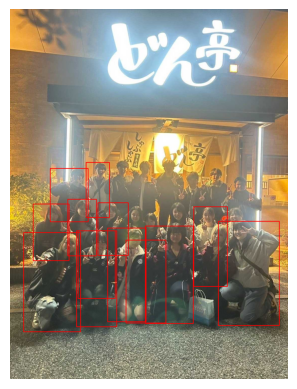

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

results = model("1765887706510.jpg")

img = cv2.imread("1765887706510.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

count = 0
for r in results:
    for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
        if int(cls) == 0:  # person
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            count += 1

plt.imshow(img)
plt.axis("off")
print("検出された人数:", count)


23人中13人が検出された。

左下が検出され右上がほとんど検出されなかった。

考えられる理由として顔が小さい　顔が影になっている　顔の一部が隠れているがあると考えた。

## chatGPTによると ##

本画像では、照明条件や人物の位置の違いにより、
顔が暗く写っている人物や小さく写っている人物は検出されなかった。
顔検出は顔の特徴（目・鼻・口）が明確に認識できる場合に精度が高く、
夜間撮影や集合写真では一部の顔のみが検出されるという限界がある。


## 対策案 ##

明るい場所で撮影する、
画像解像度を上げる、
MTCNN と YOLO の結果を併用する、

## 所感 ##

大人数映った画像の人数を数えるとき。

夜に撮った画像、手や髪で顔が隠れてる、解像度が低いなどで検出の制度が下がった。

移った人の顔の数を自動で数えてくれるから。